<a href="https://colab.research.google.com/github/Mani0322/Deep-learning/blob/main/intel_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content/gdrive/MyDrive"

In [4]:
!kaggle datasets download -d puneet6060/intel-image-classification

100% 346M/346M [00:01<00:00, 219MB/s]
100% 346M/346M [00:01<00:00, 215MB/s]


In [6]:
class_names = ["buildings","forest","glacier","mountain","sea","street"]
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
print(class_names_label)

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


In [7]:
import cv2
from tqdm import tqdm
import numpy as np

In [8]:
def load_data():

  datasets = ["/content/seg_train/seg_train","/content/seg_test/seg_test"]
  output = []
  for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                 # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels)) 

  return output

        



In [9]:
(train_images,train_labels),(test_images,test_labels) = load_data()

Loading /content/seg_train/seg_train


100%|██████████| 2512/2512 [00:02<00:00, 1034.07it/s]


Loading /content/seg_test/seg_test


100%|██████████| 525/525 [00:00<00:00, 1157.33it/s]


In [10]:
from sklearn.utils import shuffle
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [11]:
train_images.shape

(14034, 150, 150, 3)

In [12]:
train_images = train_images/255.0
test_images = test_images/255.0

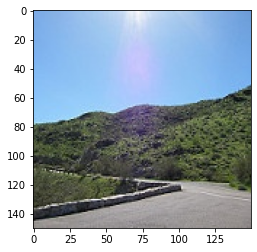

In [13]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[2])
plt.show()

In [14]:
train_images = train_images.reshape(len(train_images),150,150,3)
test_images = test_images.reshape(len(test_images),150,150,3)

In [15]:
import tensorflow as tf
from tensorflow import keras

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [18]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [19]:
history = model.fit(train_images,train_labels,epochs=20,validation_split=0.2,batch_size=128)

Epoch 1/20
88/88 [==============================] - 19s 92ms/step - loss: 1.4708 - accuracy: 0.4943 - val_loss: 0.9506 - val_accuracy: 0.6398
Epoch 2/20
88/88 [==============================] - 6s 64ms/step - loss: 0.8214 - accuracy: 0.6919 - val_loss: 0.8357 - val_accuracy: 0.7018
Epoch 3/20
88/88 [==============================] - 6s 63ms/step - loss: 0.6705 - accuracy: 0.7515 - val_loss: 0.7818 - val_accuracy: 0.7207
Epoch 4/20
88/88 [==============================] - 6s 63ms/step - loss: 0.5127 - accuracy: 0.8168 - val_loss: 0.6466 - val_accuracy: 0.7674
Epoch 5/20
88/88 [==============================] - 6s 63ms/step - loss: 0.3671 - accuracy: 0.8769 - val_loss: 0.6784 - val_accuracy: 0.7681
Epoch 6/20
88/88 [==============================] - 6s 63ms/step - loss: 0.2673 - accuracy: 0.9151 - val_loss: 0.8155 - val_accuracy: 0.7428
Epoch 7/20
88/88 [==============================] - 6s 63ms/step - loss: 0.1755 - accuracy: 0.9450 - val_loss: 0.7283 - val_accuracy: 0.7766
Epoch 8/20
8

In [20]:
test_loss,test_acc = model.evaluate(test_images,test_labels)

94/94 [==============================] - 1s 9ms/step - loss: 1.1390 - accuracy: 0.7777


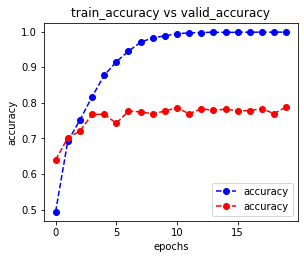

In [25]:
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.plot(history.history["accuracy"],"bo--",label="accuracy")
plt.plot(history.history["val_accuracy"],"ro--",label="accuracy")
plt.title("train_accuracy vs valid_accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()
plt.show()

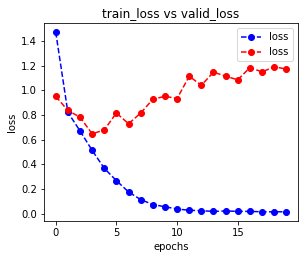

In [26]:
plt.figure(figsize=(10,8))
plt.subplot(222)
plt.plot(history.history["loss"],"bo--",label="loss")
plt.plot(history.history["val_loss"],"ro--",label="loss")
plt.title("train_loss vs valid_loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [27]:
def display_random_image(class_names, images, labels):
    
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

In [28]:
predictions = model.predict(test_images)     
pred_labels = np.argmax(predictions, axis = 1) 


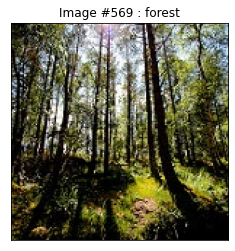

In [29]:
display_random_image(class_names, test_images, pred_labels)